In [1]:
using PyPlot

# Tarea 2: Derivación numérica

Fecha de envío del PR inicial: **martes 14 de marzo**

Fecha de aceptación del PR: **lunes 20 de marzo**

## Ejercicio 1: Derivada *derecha*

(a) Definan una función `derivada_derecha` que calcule *numéricamente* la derivada de una función $f(x)$ en una variable (a priori arbitaria) que se debe introducir como argumento, en un punto $x_0$ arbitrario, pero que por default lo hace en  $x_0=0.0$. 

Para esto, utilicen la aproximación de la derivada, que se basa en su definición:

\begin{equation}
f'(x_0) \approx \frac{\Delta f_+}{\Delta x} = \frac{f(x_0+h)-f(x_0)}{h},
\end{equation}

lo que requiere la especificación de `h`. (Este método también se conoce por el nombre de *diferencias finitas*.)

(b) A fin de simular el $\lim_{h\to 0}$, consideren distintos valores de $h$ que precisamente simulen dicho límite. Para cada valor de $h$ calculen el error absoluto del cálculo numérico (respecto al valor *exacto*, que deberán conocer analíticamente). 

Para ser concretos, prueben su implementación de `derivada_derecha` con la función de prueba $f(x) = 3x^3-2$, en $x_0=1$. Dibujen, como función de $h$, el error de su cálculo; usen escala logarítmica en ambos ejes. A partir de eso, ¿qué conclusión podemos sacar sobre *la convergencia* del cálculo numérico de la derivada, o sea, cómo nos acercamos al valor *exacto* de la deriva al considerar $lim_{h\to 0}$? 


In [2]:
f(x) = 3 * x^3 - 2

f (generic function with 1 method)

Analiticamente tenemos que la derivada de $f(x)=3x^3-2$ es $f'(x)=9x^2$, por lo tanto $f'(1) = 9$

In [3]:
doc""" 
derivada_derecha(funcion, punto, intervalo)

Función que calcula una aproximación numérica de la derivada en el
punto dado utilizando el método de diferencias finitas.

$ f'(x_0) \approx \frac{f(x_0 - h) - f(x_0)}{h} $


Cuando $ h << 1$.
"""

function derivada_derecha(f::Function, x0::Real = 0.0, h::Real = 0.001)
    derivada = (f(x0 + h) - f(x0)) / h
    return derivada
end

derivada_derecha

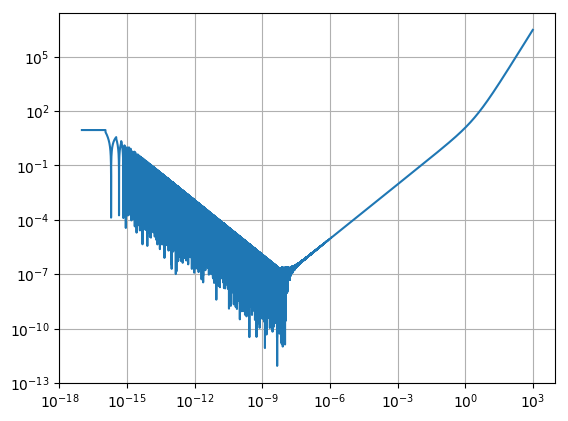

In [4]:
hs1 = logspace(-17, 3, 1000000)
n1 = length(hs1)
err1 = ones(n1) * 9.0

for i = 1:n1
    err1[i] = abs(err1[i] - derivada_derecha(f, 1.0, hs1[i]))
end

grid()
loglog(hs1, err1);

Vemos que el valor de la derivada converge de manera exponencial (representado por una recta en una gráfica log-log) hasta que el valor de h se acerca a $10^{-9}$ donde empieza a aparecer un error de redondeo y el error crece mientras h disminuye.

Algo interesante es que la manera en la que converge cambia al pasar por $10^{1}$.

## Ejercicio 2: Derivada simétrica

Repitan el ejercicio anterior usando la aproximación que se basa en la versión *simétrica* de la definición de la derivada, es decir:

\begin{equation}
f'(x_0) \approx \frac{ \Delta f_{sym}}{\Delta x} = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h}.
\end{equation}

¿Qué pueden concluir respecto a la convergencia? ¿Cómo se compara este algoritmo con el del ejercicio anterior?

In [5]:
doc""" 
derivada_simetrica(funcion, punto, intervalo)

Función que calcula una aproximación numérica de la derivada en el
punto dado utilizando el método de diferencias finitas de manera simétrica.

$ f'(x_0) \approx \frac{f(x_0 + h) - f(x_0 -h)}{2h} $


Cuando $ h << 1$.
"""

function derivada_simetrica(f::Function, x0::Real = 0.0, h::Real = 0.01)
    derivada = (f(x0 + h) - f(x0 - h)) / (2 * h)
    return derivada
end

derivada_simetrica

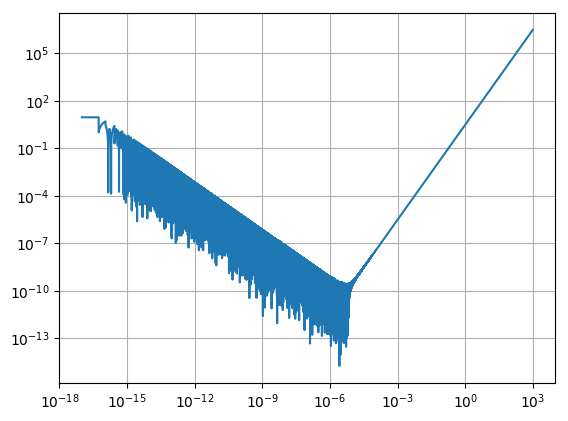

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f5af1c1e210>

In [6]:
hs2 = logspace(-17, 3, 1000000)
n2 = length(hs2)
err2 = ones(n2) * 9.0

for i = 1:n2
    err2[i] = abs(err2[i] - derivada_simetrica(f, 1.0, hs2[i]))
end

grid()
loglog(hs2, err2)

En este caso el error no solo fue menor, tambien se encontro antes, alrededor de $10^{-6}$ en vez de $10^{-9}$, pero después aparece el mismo error que antes.

## Ejercicio 3: Derivada *compleja*

Repitan el ejercicio anterior considerando ahora que el incremento de la variable independiente es infinitesimal e *imaginario*. Esto es, nos basaremos en la definición de la derivada dada por:

\begin{equation}
f'(x_0) \approx \frac{\Delta f_{cmplx}(x_0)}{\Delta x} = Im\Big(\frac{f(x_0+ i h)}{h}\Big).
\end{equation}


In [7]:
doc""" 
derivada_compleja(funcion, punto, intervalo)

Función que calcula una aproximación numérica de la derivada en el
punto dado utilizando el método de diferencias finitas de manera compleja.

$ f'(x_0) \approx Im\Big(\frac{f(x_0+ i h)}{h}\Big) $


Cuando $ h << 1$.
"""

function derivada_compleja(f::Function, x0 = 0.0, h::Real = 0.01)
    derivada = (f(x0 + im * h) - f(x0)) / h
    return imag(derivada)
end

derivada_compleja

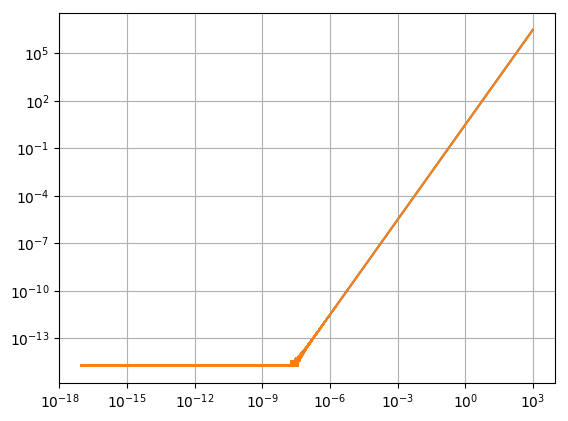

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f5af2cc1a90>

In [11]:
hs3 = logspace(-17, 3, 1000000)
n3 = length(hs3)
err3 = ones(n3) * 9

for i = 1:n3
    err3[i] = abs(err3[i] - derivada_compleja(f, 1.0, hs3[i]))
end

grid()
loglog(hs3, err3);

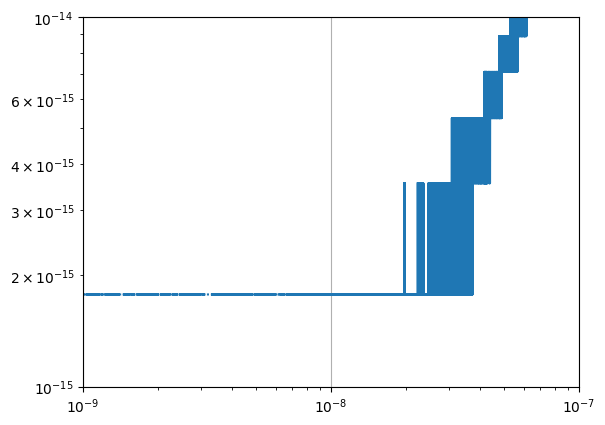

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f5af2057790>

In [22]:
xlim(10e-10, 10e-8)
ylim(10e-16, 10e-15)
grid()
loglog(hs3, err3)

En este caso la convergencia fue mucho mejor, aparece algo de error de redondeo cuando estamos por llegar al punto crítico (alrededor de $10^{-8}$) pero este se comporta mucho mejor que en los casos anteriores. Después de este valor crítico tenemos que el error se mantiene estable, pero aparecen ciertas discontinuidades.

## Ejercicio 4: Preguntas

- ¿Cuál de las definiciones anteriores es mejor en términos de dar el valor *más exacto* de la derivada? Den un argumento sólido de su conclusión en términos del tipo de convergencia hacia el valor exacto.

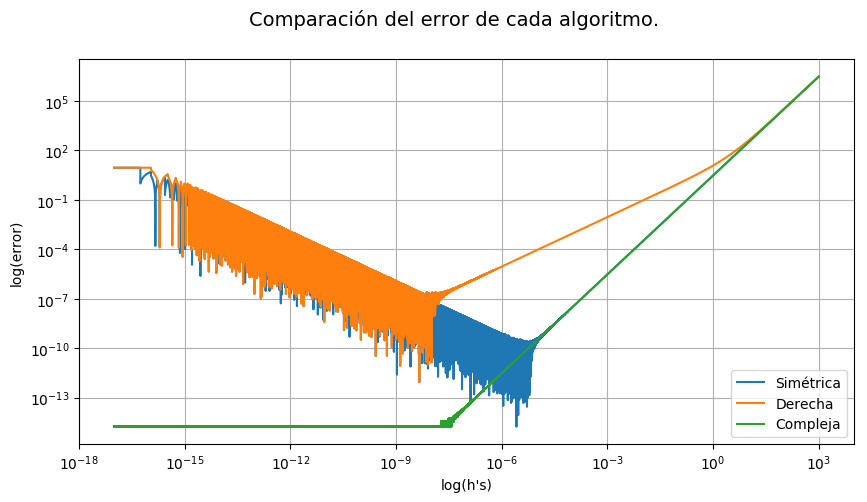

In [25]:
fig = figure("pyplot_subplot_mixed",figsize=(10,5))
suptitle("Comparación del error de cada algoritmo.", fontsize=14)

xlabel("log(h's)")
ylabel("log(error)")

loglog(hs2, err2, "-", label = "Simétrica")
loglog(hs1, err1, "-", label = "Derecha")
loglog(hs3, err3, "-", label = "Compleja")
grid()
legend(loc = "lower right");

Tenemos que el método que más se acerca al valor real (analitico) es el de la derivada compleja, después tenemos al de derivada simétrica y al final el de derivada derecha. Algo a tomar en cuenta es que el que alcanza más rápido el mínimo es el de derivada simétrica, pero sufre de mucho error de redondeo. La derivada compleja sufre de error de redondeo cerca de su punto de convergencia pero se vuelve constante  después de ese punto.


Algo curioso es que antes de $10^{0}$ (viendo la gráfica de derecha a izquierda) los tres algoritmos parecen converger de la misma manera, pero entre $10^{0}$ y $10^{-6}$ el método de derivada derecha se separa de los otros dos.

También hay que ver que después de los respectivos puntos mínimos en los errores de la derivada derecha y simétrica, estos crecen de igual manera respecto a h.

- ¿Qué comportamiento mostrado por las derivadas en términos de $h$ nos incomoda más? ¿A qué atribuyen esto?

Que se espera que el error disminuya mientras h disminuye, cosa que a partir de cierta h no ocurre con la derivada simétrica ni la derivada derecha.

Es posible que este comportamiento se deba a que en los algoritmos de derivada derecha y simétrica se realiza una resta, esto genera un error de redondeo que se hace cada vez más pequeña mientras h disminuye.